<a href="https://colab.research.google.com/github/iamharkirat/EDA/blob/main/STP540_Single_Layer_Neural_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simulated Data

In [2]:
np.random.seed(42)
X = np.random.rand(100, 10) * 10
y = np.where(X[:, 0] > 5, 1, 0)  # use the first column of X as the label

In [3]:
X.shape

(100, 10)

## Run the Model

In [4]:
# Generate simulated data
np.random.seed(42)
X = np.random.rand(100, 10) * 10
y = np.where(X[:, 0] > 5, 1, 0) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'hidden_units': [2, 4 , 10]
}

# Create a function that builds the model
def build_model(hidden_units=8, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=hidden_units, input_shape=[X_train_scaled.shape[1]], activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model using KerasRegressor
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit GridSearchCV object to data
grid_search.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)

<ipython-input-4-7d9c8de7cb5e>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model)


Streaming output truncated to the last 5000 lines.
Epoch 28/100
2/2 [==============================] - 0s 60ms/step - loss: 0.3570 - accuracy: 0.9524 - val_loss: 0.5560 - val_accuracy: 0.7273
Epoch 29/100
2/2 [==============================] - 0s 56ms/step - loss: 0.3490 - accuracy: 0.9524 - val_loss: 0.5480 - val_accuracy: 0.7273
Epoch 30/100
2/2 [==============================] - 0s 48ms/step - loss: 0.3408 - accuracy: 0.9524 - val_loss: 0.5401 - val_accuracy: 0.7273
Epoch 31/100
2/2 [==============================] - 0s 60ms/step - loss: 0.3325 - accuracy: 0.9524 - val_loss: 0.5322 - val_accuracy: 0.8182
Epoch 32/100
2/2 [==============================] - 0s 59ms/step - loss: 0.3247 - accuracy: 0.9524 - val_loss: 0.5242 - val_accuracy: 0.8182
Epoch 33/100
2/2 [==============================] - 0s 71ms/step - loss: 0.3167 - accuracy: 0.9524 - val_loss: 0.5168 - val_accuracy: 0.8182
Epoch 34/100
2/2 [==============================] - 0s 65ms/step - loss: 0.3081 - accuracy: 0.9762 - va

# Apply the Model to Real Data

In [5]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.drop('Car_Name', axis=1, inplace=True)
df['Current_Year']=2023
df['Car_Age']=df['Current_Year']-df['Year']
df.drop(['Year','Current_Year'], axis=1, inplace=True)
final_df=pd.get_dummies(df, drop_first=True)

In [7]:
X = final_df.drop('Selling_Price', axis=1).reset_index(drop=True)
y = final_df['Selling_Price']

print(X.shape, y.shape)

(301, 8) (301,)


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Car_Age                 301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


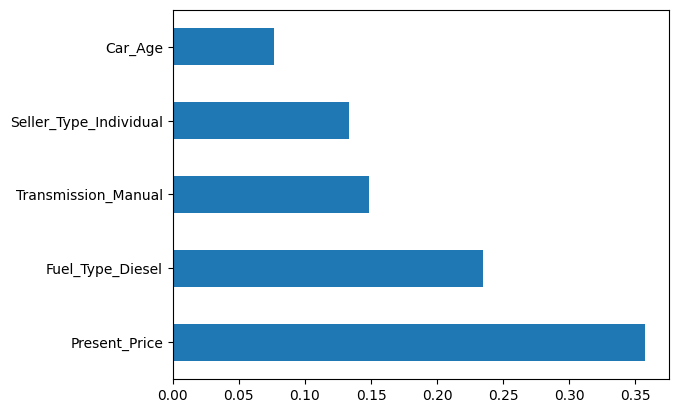

In [9]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

# plot graph of feature imoprtance for better visualization
feature_importance=pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh');

## Run the model on Real Data

In [10]:
# Define input and output variables
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'epochs': [50, 100, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'hidden_units': [2, 4 , 10]
}
# Create a function that builds the model
def build_model(hidden_units=8, learning_rate=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=hidden_units, input_shape=[X_train_scaled.shape[1]], activation='relu'),
        tf.keras.layers.Dense(units=1, activation='linear')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Create the model using KerasRegressor
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit GridSearchCV object to data
grid_search.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Save hyperparameters and corresponding accuracy in a pandas dataframe
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_epochs', 'param_learning_rate', 'param_hidden_units', 'mean_test_score']]
results = results.rename(columns={
    'param_epochs': 'Epochs', 
    'param_learning_rate': 'Learning Rate', 
    'param_hidden_units': 'Hidden Units', 
    'mean_test_score': 'Accuracy'
})

# Sort results by accuracy and reset index
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(results)

Epoch 1/100


<ipython-input-10-5628780327f1>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)


Streaming output truncated to the last 5000 lines.
Epoch 28/100
4/4 [==============================] - 0s 14ms/step - loss: 35.9302 - val_loss: 24.8897
Epoch 29/100
4/4 [==============================] - 0s 15ms/step - loss: 35.6771 - val_loss: 24.6701
Epoch 30/100
4/4 [==============================] - 0s 24ms/step - loss: 35.4291 - val_loss: 24.4535
Epoch 31/100
4/4 [==============================] - 0s 19ms/step - loss: 35.1772 - val_loss: 24.2419
Epoch 32/100
4/4 [==============================] - 0s 26ms/step - loss: 34.9269 - val_loss: 24.0357
Epoch 33/100
4/4 [==============================] - 0s 19ms/step - loss: 34.7014 - val_loss: 23.8277
Epoch 34/100
4/4 [==============================] - 0s 22ms/step - loss: 34.4653 - val_loss: 23.6223
Epoch 35/100
4/4 [==============================] - 0s 20ms/step - loss: 34.2410 - val_loss: 23.4172
Epoch 36/100
4/4 [==============================] - 0s 16ms/step - loss: 33.9967 - val_loss: 23.2195
Epoch 37/100
4/4 [======================